In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import cv2
import keras
import matplotlib.pylab as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
EPOCH = 8

In [3]:
base_dir = "D:\\EPICS\\DiseaseDect\\archive (4)\\new plant diseases dataset(augmented)\\New Plant Diseases Dataset(Augmented)"
train_dir = os.path.join(base_dir,"train")
valid_dir = os.path.join(base_dir,"valid")
diseases = os.listdir(train_dir)
print(diseases)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [4]:
print(len(diseases))

38


In [5]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0,
                                                             shear_range = 0.2,
                                                             zoom_range = 0.2,
                                                             width_shift_range = 0.2,
                                                             height_shift_range = 0.2,
                                                             fill_mode="nearest")



validation_datagen =  keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)

In [6]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
  
)

val_data = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


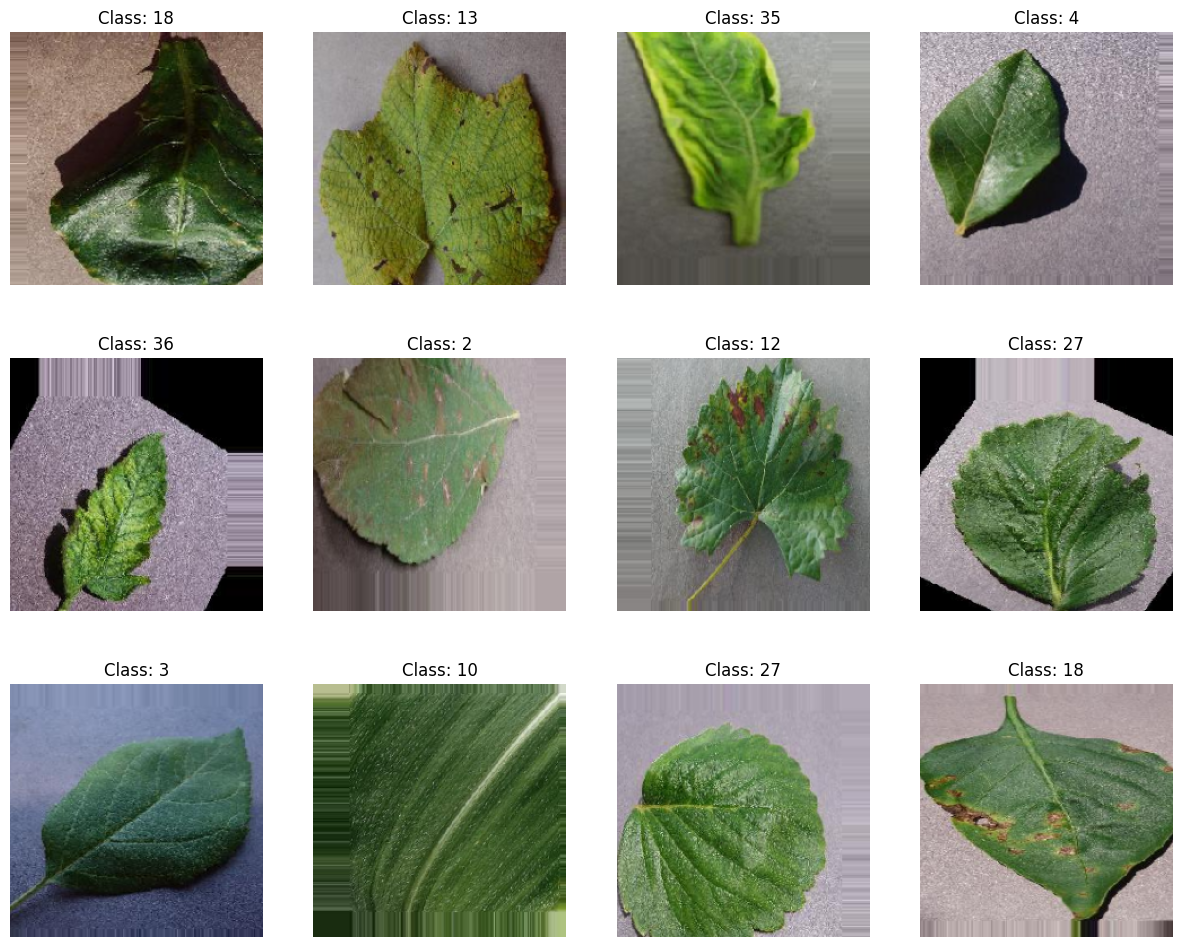

In [7]:
images, labels = next(train_data)
plt.figure(figsize=(15, 12))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1) 
    plt.imshow(images[i])
    plt.title(f"Class: {labels[i].argmax()}")
    plt.axis("off")

plt.show()

In [8]:
diseases = os.listdir(train_dir)
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Apple___Apple_scab,2016
Apple___Black_rot,1987
Apple___Cedar_apple_rust,1760
Apple___healthy,2008
Blueberry___healthy,1816
Cherry_(including_sour)___healthy,1826
Cherry_(including_sour)___Powdery_mildew,1683
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,1642
Corn_(maize)___Common_rust_,1907
Corn_(maize)___healthy,1859


Text(0.5, 1.0, 'Images per each class of plant disease')

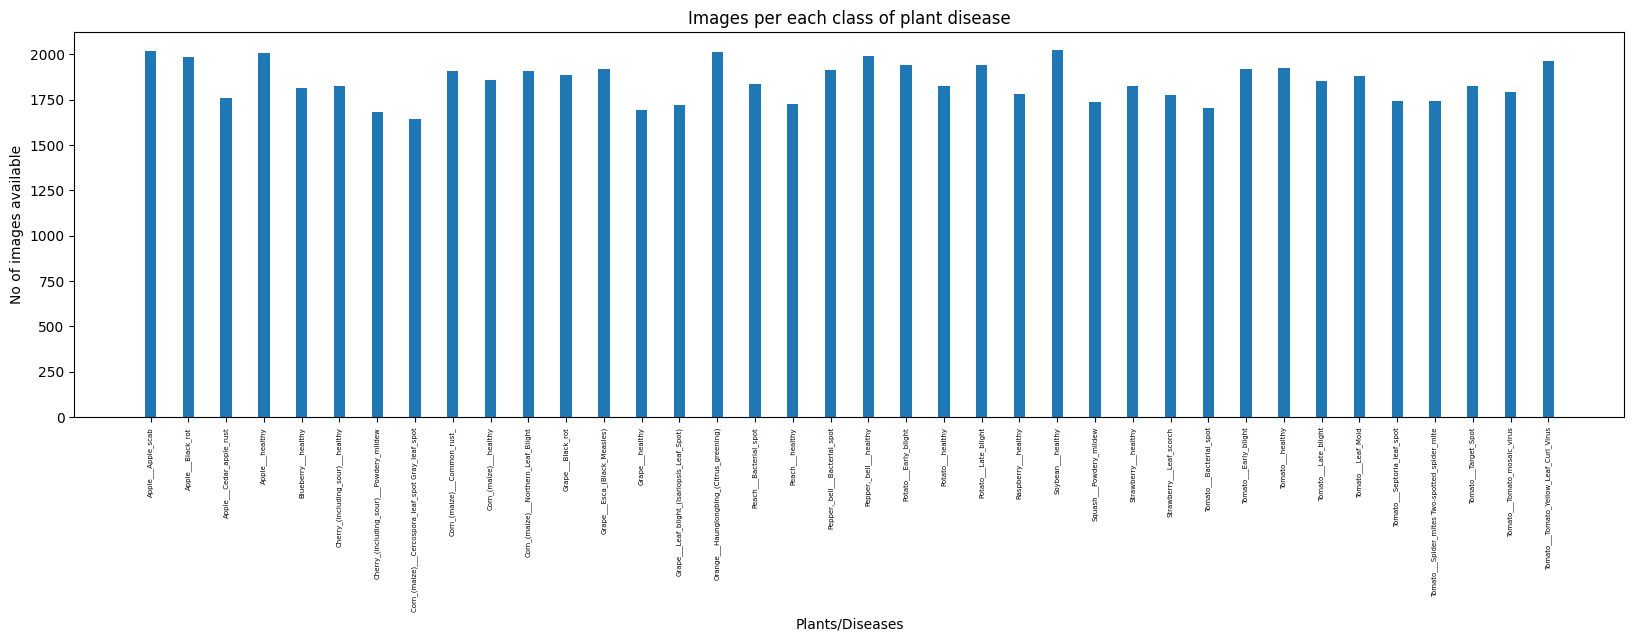

In [9]:
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [15]:
categories = list(train_data.class_indices.keys())
print(train_data.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [10]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [19]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')

if gpus:
    gpu = gpus[0]
    tf.config.experimental.set_visible_devices(gpu, 'GPU')
    strategy = tf.distribute.MirroredStrategy(devices=['GPU:0'])
else:
    strategy = tf.distribute.get_strategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [20]:
with strategy.scope():
    base_model = tf.keras.applications.MobileNet(weights = "imagenet",
                                             include_top = False,
                                             input_shape = INPUT_SHAPE)

    base_model.trainable = False
    inputs = keras.Input(shape = INPUT_SHAPE)

    x = base_model(inputs, training = False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(len(categories), 
                              activation="softmax")(x)

    model = keras.Model(inputs = inputs, 
                        outputs = x, 
                        name="LeafDisease_MobileNet")
    optimizer = tf.keras.optimizers.Adam()

    model.compile(optimizer = optimizer,
                  loss = tf.keras.losses.CategoricalCrossentropy(),
                  metrics=[keras.metrics.CategoricalAccuracy(), 
                           'accuracy'])
    history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=EPOCH,
                    steps_per_epoch=150,
                    validation_steps=100,
                       callbacks=[early_stopping_callback])

Epoch 1/8
150/150 [==============================] - 98s 613ms/step - loss: 2.0301 - categorical_accuracy: 0.4696 - accuracy: 0.4696 - val_loss: 0.8111 - val_categorical_accuracy: 0.7941 - val_accuracy: 0.7941
Epoch 2/8
150/150 [==============================] - 100s 667ms/step - loss: 0.8022 - categorical_accuracy: 0.7771 - accuracy: 0.7771 - val_loss: 0.4883 - val_categorical_accuracy: 0.8703 - val_accuracy: 0.8703
Epoch 3/8
150/150 [==============================] - 103s 684ms/step - loss: 0.5630 - categorical_accuracy: 0.8371 - accuracy: 0.8371 - val_loss: 0.3759 - val_categorical_accuracy: 0.8988 - val_accuracy: 0.8988
Epoch 4/8
150/150 [==============================] - 98s 650ms/step - loss: 0.4750 - categorical_accuracy: 0.8604 - accuracy: 0.8604 - val_loss: 0.3174 - val_categorical_accuracy: 0.9091 - val_accuracy: 0.9091
Epoch 5/8
150/150 [==============================] - 97s 644ms/step - loss: 0.4030 - categorical_accuracy: 0.8794 - accuracy: 0.8794 - val_loss: 0.2782 - val_

In [21]:
model.save('classifier.keras')
model.save('dismodel.h5')

In [22]:
acc= history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]


In [23]:
val_acc

[0.7940624952316284,
 0.870312511920929,
 0.8987500071525574,
 0.9090625047683716,
 0.9143750071525574,
 0.9203125238418579,
 0.9200000166893005,
 0.9203125238418579]

Text(0.5, 1.0, 'Training and Validation Accuracy')

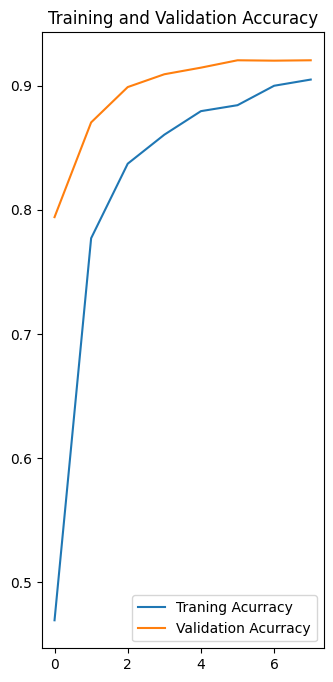

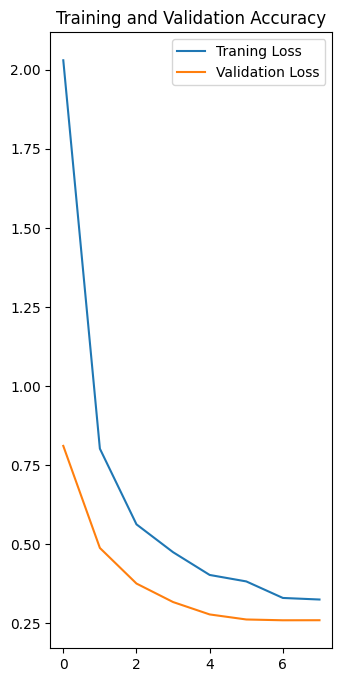

In [24]:
plt.figure(figsize =(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), acc, label ='Traning Acurracy')
plt.plot(range(EPOCH), val_acc, label ='Validation Acurracy')
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.figure(figsize =(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), loss, label ='Traning Loss')
plt.plot(range(EPOCH), val_loss, label ='Validation Loss')
plt.legend(loc="upper right")
plt.title("Training and Validation Accuracy")

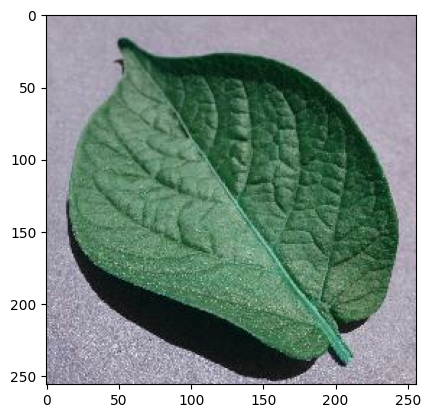

In [33]:
img = cv2.imread('D:\\EPICS\\DiseaseDect\\archive (4)\\test\\test\\PotatoHealthy1.JPG')
plt.imshow(img)
plt.show()

In [34]:
resize = tf.image.resize(img, (224,224))
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat
predicted_class_index = yhat.argmax()
predicted_class_index
class_labels = list(train_data.class_indices.keys())
predicted_class_label = class_labels[predicted_class_index]
print(predicted_class_label)


1/1 [==============================] - 2s 2s/step
Potato___healthy


In [35]:
class_labels= ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [36]:
plant_list = [" ".join(filter(None, i.split('_'))) for i in class_labels]

In [37]:
" ".join(filter(None, 'Tomato___Target_Spot'.split('_')))

'Tomato Target Spot'

In [38]:
import re
pattern = r'\(.*?\)'

class_labels = [re.sub(pattern, '', item).strip() for item in plant_list]

print(class_labels)


['Apple Apple scab', 'Apple Black rot', 'Apple Cedar apple rust', 'Apple healthy', 'Blueberry healthy', 'Cherry  Powdery mildew', 'Cherry  healthy', 'Corn  Cercospora leaf spot Gray leaf spot', 'Corn  Common rust', 'Corn  Northern Leaf Blight', 'Corn  healthy', 'Grape Black rot', 'Grape Esca', 'Grape Leaf blight', 'Grape healthy', 'Orange Haunglongbing', 'Peach Bacterial spot', 'Peach healthy', 'Pepper, bell Bacterial spot', 'Pepper, bell healthy', 'Potato Early blight', 'Potato Late blight', 'Potato healthy', 'Raspberry healthy', 'Soybean healthy', 'Squash Powdery mildew', 'Strawberry Leaf scorch', 'Strawberry healthy', 'Tomato Bacterial spot', 'Tomato Early blight', 'Tomato Late blight', 'Tomato Leaf Mold', 'Tomato Septoria leaf spot', 'Tomato Spider mites Two-spotted spider mite', 'Tomato Target Spot', 'Tomato Tomato Yellow Leaf Curl Virus', 'Tomato Tomato mosaic virus', 'Tomato healthy']


In [39]:
def predict(model, img, class_labels):
    img = cv2.imread(img)
    resize = tf.image.resize(img, (224,224))
    yhat = model.predict(np.expand_dims(resize/255, 0))
    predicted_class_index = yhat.argmax()

    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label

In [40]:
predict(model=model, img='D:\\EPICS\\DiseaseDect\\archive (4)\\test\\test\\AppleCedarRust2.JPG', class_labels=class_labels)

1/1 [==============================] - 0s 139ms/step


'Apple Cedar apple rust'

In [41]:
new_model = tf.keras.models.load_model('classifier.keras')

In [42]:
predict(model=new_model, img='D:\\EPICS\\DiseaseDect\\archive (4)\\test\\test\\AppleCedarRust2.JPG', class_labels=class_labels)

1/1 [==============================] - 1s 689ms/step


'Apple Cedar apple rust'